### Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [46]:
import pandas as pd

drugs_df = pd.read_csv('./datasets/drugs.csv')
drugs_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### 레이블 인코딩
- 문자열 값을 정수로 변경하는 데이터 전처리 기법

##### 타겟 데이터(의약품) 레이블 인코딩

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder_names = ["Sex","BP","Cholesterol","Drug"]
encoders = {}

for name in encoder_names:
    encoders[name] = LabelEncoder()
    targets = encoders[name].fit_transform(drugs_df[name])
    drugs_df[name] = targets

drugs_df



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [48]:
display(drugs_df)
encoders['Drug'].classes_

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

In [49]:
#중복행 검사
drugs_df.duplicated().sum()

# 결측치 검사
drugs_df.isna().sum()



Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier 생성
decision_tree_classifier = DecisionTreeClassifier(random_state=124)

# 약품 데이터셋을 타겟과 피쳐로 나누기
drug_feature = drugs_df.iloc[:,:-1]
drug_target = drugs_df.iloc[:,-1]

#테스트셋과 트레인셋 분리

X_train, X_test, Y_train, Y_test = \
train_test_split(drug_feature, drug_target, test_size=0.2, random_state=124)

# DecisionTreeClassifier 학습
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=124)

### 모델 학습 시각화

In [51]:
from sklearn.tree import export_graphviz



# export_graphviz()의 out_file로 지정된 dot파일을 생성
export_graphviz(decision_tree_classifier
                , out_file="./images/drugs_tree01.dot"
                , class_names=encoders['Drug'].classes_
                , feature_names=drug_feature.columns
                , impurity=True
                , filled=True)

In [52]:
import graphviz

with open("./images/drugs_tree01.dot") as f:
    dot_graph = f.read()

drugs_tree01_graph = graphviz.Source(dot_graph)

In [53]:
drugs_tree01_graph.render(filename="drugs_tree01", directory='./images', format="png")

'images\\drugs_tree01.png'

<img src="./images/drugs_tree01.png" width=800 style="margin-left:0">

In [54]:
# 모델학습에서 어떤 피쳐를 중요하게 산정했는지 중요도 체크

for name, value in zip(drug_feature.columns, decision_tree_classifier.feature_importances_):
    print(f'{name}, {round(value, 4)}')

Age, 0.1175
Sex, 0.0
BP, 0.2761
Cholesterol, 0.1339
Na_to_K, 0.4726


<Axes: >

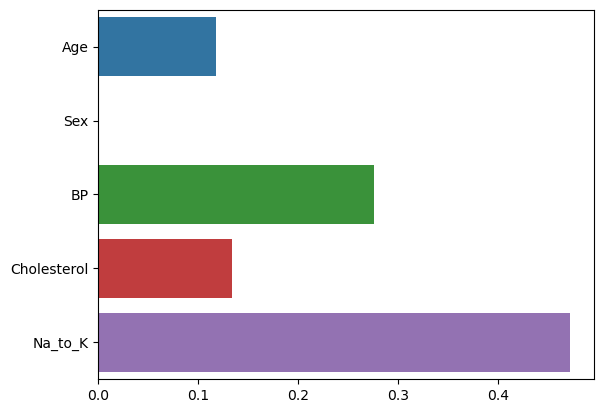

In [55]:
import seaborn as sns

sns.barplot(x=decision_tree_classifier.feature_importances_, y=drug_feature.columns)

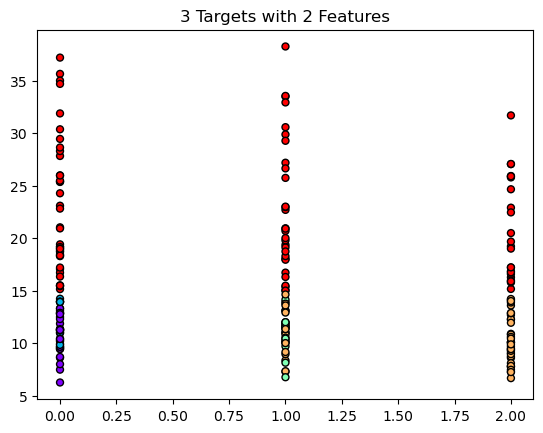

In [56]:
import matplotlib.pyplot as plt

features, targets = drug_feature, drug_target

plt.title("3 Targets with 2 Features")
plt.scatter(features.iloc[:, 2], features.iloc[:, 4], marker='o', c=targets, s=25, cmap="rainbow", edgecolors='k')

In [57]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


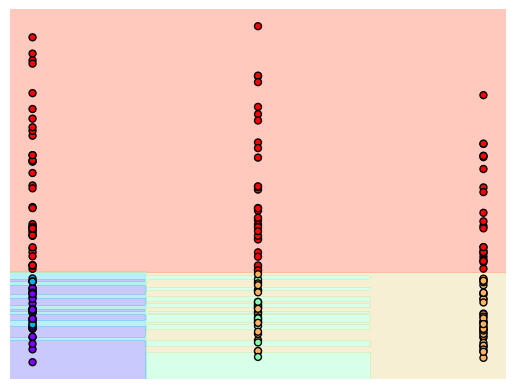

In [59]:
from sklearn.tree import DecisionTreeClassifier

features, targets = drugs_df.iloc[:, [2, 4]], drug_target

decision_tree_classifier = DecisionTreeClassifier(random_state=124).fit(features, targets)
visualize_boundary(decision_tree_classifier, features, targets)

,BP,Na_to_K
0,0,25.355
1,1,13.093
2,1,10.114
3,2,7.798
4,1,18.043
...,...,...
195,1,11.567
196,1,12.006
197,2,9.894
198,2,14.020


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


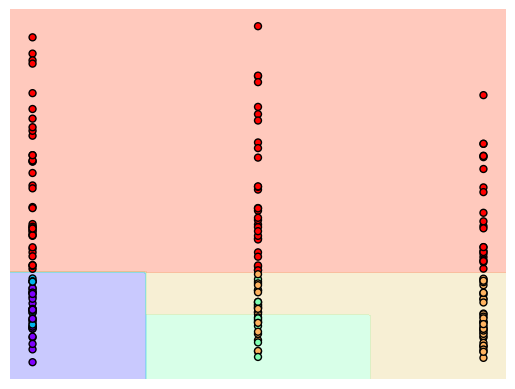

In [63]:
from sklearn.tree import DecisionTreeClassifier

features, targets = drugs_df.iloc[:, [2, 4]], drug_target
display(features)

decision_tree_classifier = DecisionTreeClassifier(random_state=124, min_samples_leaf=10).fit(features, targets)
visualize_boundary(decision_tree_classifier, features, targets)

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Targets with 2 Features")

# 2차원 시각화를 위해서 feature는 2개, target은 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_targets = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=124)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_targets, s=25, cmap="rainbow", edgecolors='k')